# Imports & Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import joblib 

df = pd.read_csv('processed_churn_data.csv')
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,0,True,True,True,True,False,...,False,True,False,True,True,False,True,False,False,True
7028,0,72,103.20,7362.90,0,False,True,True,True,False,...,False,True,False,True,True,False,True,True,False,False
7029,0,11,29.60,346.45,0,False,True,True,False,True,...,False,False,False,False,False,False,True,False,True,False
7030,1,4,74.40,306.60,1,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [2]:
X = df.drop('Churn', axis=1)
y = df['Churn']
print("Data Loaded. Shape:", X.shape)

Data Loaded. Shape: (7032, 30)


# Train-Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training shapes: X={X_train.shape}, y={y_train.shape}")
print(f"Testing shapes:  X={X_test.shape},  y={y_test.shape}")

Training shapes: X=(5625, 30), y=(5625,)
Testing shapes:  X=(1407, 30),  y=(1407,)


# Handling Imbalance (SMOTE)
# Here, We create synthetic churners so the model doesn't get biased toward the majority class.

In [4]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original Churn Counts:", y_train.value_counts())
print("Resampled Churn Counts:", y_train_resampled.value_counts())

Original Churn Counts: Churn
0    4130
1    1495
Name: count, dtype: int64
Resampled Churn Counts: Churn
1    4130
0    4130
Name: count, dtype: int64


# Train Random Forest

In [5]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1033
           1       0.57      0.58      0.58       374

    accuracy                           0.77      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



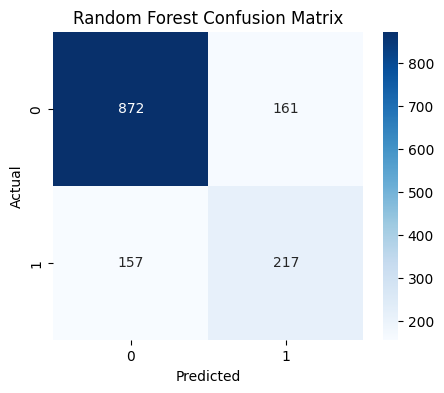

In [6]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Train XGBoost

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.56      0.59      0.58       374

    accuracy                           0.77      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



/Users/srimohanapriyan/ML/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [15:56:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


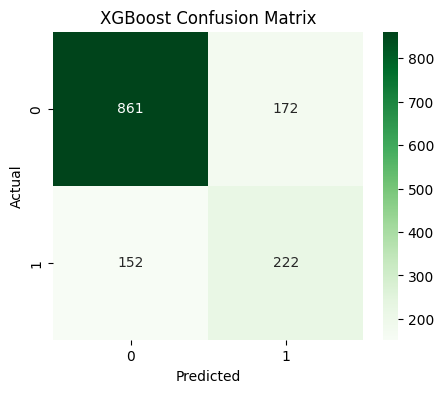

In [7]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_xgb))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens')
plt.title('XGBoost Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [8]:
joblib.dump(xgb_model, 'churn_model_xgb.pkl')
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')

print("Model and Column names saved successfully!")

Model and Column names saved successfully!
